# Prompt Chaining with LangChain - A Comprehensive Overview

Prompt chaining is a foundational concept in building advanced workflows using language models (LLMs). It involves linking multiple prompts in a logical sequence, where the output of one prompt serves as the input for the next. This modular approach is powerful for solving complex tasks like multi-step text processing, summarization, question-answering, and more.

**LangChain** is a versatile framework designed to simplify the creation of such workflows. It provides tools to manage LLMs such as [IBM® Granite™ models](https://www.ibm.com/products/watsonx-ai/foundation-models) or OpenAI’s GPT (generative pre-trained transformer) models, define custom prompts, and connect them into reusable chains. By abstracting the complexity of managing prompts, LangChain allows developers to focus on solving problems rather than orchestrating interactions with LLMs.

In this tutorial, we will:
1. Explore different types of prompt chaining (Sequential, Branching, Iterative, etc.).
2. Implement a generic chaining example combining Sequential, Branching, and Iterative chaining types.
3. Leverage LangChain's built-in classes like `PromptTemplate`, `LLMChain`, and `SequentialChain` to define and manage the workflow.

## How LangChain Manages Prompt Chaining

LangChain provides a powerful framework for building modular workflows in chatbot applications. By combining structured prompts, dynamic chaining, and advanced LLM integration, it allows developers to create scalable, adaptive pipelines that leverage RAG techniques and deliver structured outputs like JSON. Here's how LangChain handles prompt chaining effectively:

**Prompt Abstraction:** LangChain leverages `from_template` to design structured input-output workflows for each step, making it easy to handle complex chatbot operations.

**LLM Integration:** The framework seamlessly integrates with various LLMs, such as, IBM Granite, OpenAI and Hugging Face, enabling fine-tuning for customized tasks.

**Chain Management:** LangChain's `SequentialChain` and `SimpleSequentialChain` enable modular workflows for chatbot pipelines, while `stroutputparser` ensures structured outputs like JSON.

**Dynamic Workflows:** Using tools like `ConditionalChain` and `systemmessage` templates, LangChain supports adaptive workflows, aligning with the principles of RAG (Retrieval-Augmented Generation) for dynamic content generation.

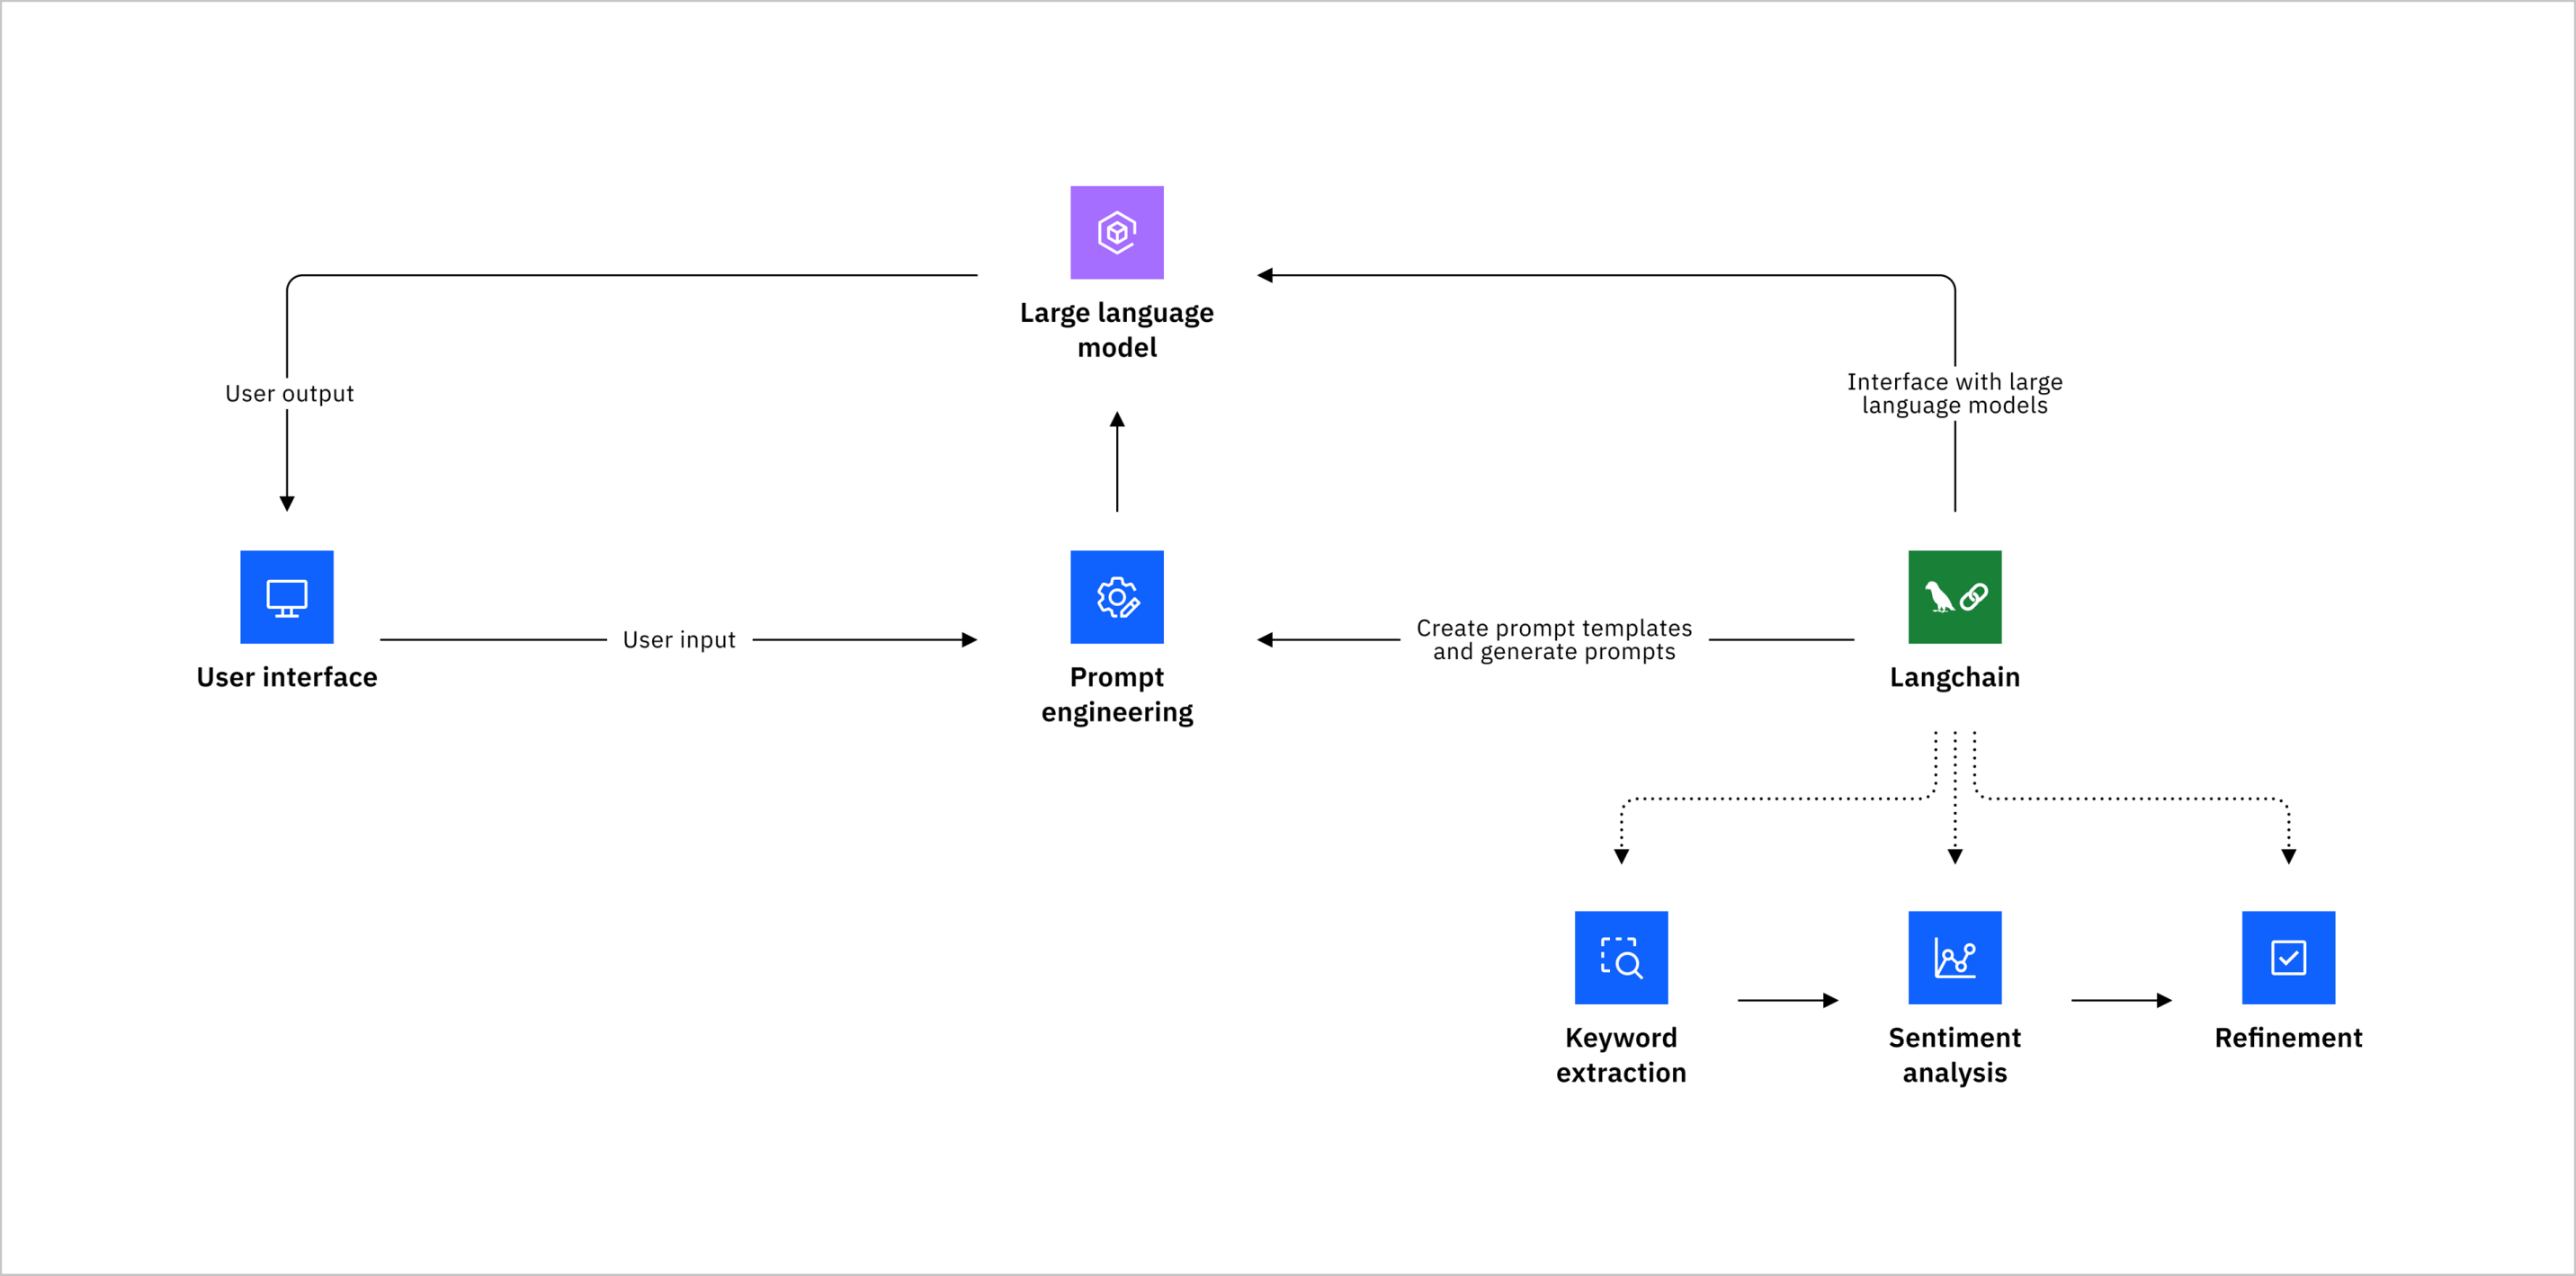

In [3]:
from IPython.display import Image, display
display(Image(filename='/Users/vrundagadesha/Tutorials/prompt-chaining-langchain-v1.png', embed=True))

By the end of this tutorial, you’ll have a solid understanding of how to use LangChain to build modular and extensible workflows for a wide range of applications.

## Types of Prompt Chaining 

Prompt chaining allows you to design workflows where outputs from one step are passed to the next. Different types of chaining support diverse workflows, ranging from simple sequential tasks to more complex, dynamic processes. Here’s a brief look at the types of prompt chaining:

- **Sequential Chaining:** The most straightforward type of chaining, where the output of one prompt is directly passed as input to the next. This is ideal for tasks with a linear progression.<sup>[1]</sup> 
- **Branching Chaining:** In branching chaining, a single output is split into multiple parallel workflows. Each branch processes the output independently. <sup>[2]</sup>
- **Iterative Chaining:** Iterative chaining involves repeatedly running a prompt or chain until a specified condition is met. This is useful for refining outputs.<sup>[3]</sup>
- **Hierarchical Chaining:** This type breaks down a large task into smaller subtasks, which are executed hierarchically. Lower-level outputs feed higher-level tasks. <sup>[4]</sup>
- **Conditional Chaining:** Conditional chaining dynamically chooses the next step based on the output of a prior prompt. It enables decision-making within workflows. 
- **Multi-Modal Chaining:** Multi-modal chaining integrates prompts that handle different data types (e.g., text, images, or audio). It is suitable for applications combining multiple modalities. <sup>[2]</sup>
- **Dynamic Chaining:** Dynamic chaining adapts the workflow based on real-time outputs or changing conditions. It adds flexibility to prompt chaining. <sup>[5]</sup>
- **Recursive Chaining:** In recursive chaining, large inputs are divided into smaller chunks for individual processing, and the results are then combined. It is useful for handling lengthy documents or datasets. <sup>[6]</sup>
- **Reverse Chaining:** Reverse chaining starts with a desired output and works backward to determine the necessary inputs or steps to achieve it. It is great for problem-solving and debugging. <sup>[5]</sup>

Each type of chaining caters to unique use cases, making it essential to choose the right one based on the task's complexity and requirements.

## Use Case - Multi-Step Text Processing

In this workflow, we process customer feedback with chat models and prompt engineering to build a scalable text-processing pipeline. The following stages of the tutorial demonstrate sequential, branching, and iterative chaining techniques powered by generative AI.

**Extracting Keywords (Sequential Chaining)**
- The input text or user input given in natural language is processed through a prompt template to identify significant keywords.
- This step uses sequential chaining to ensure the extracted keywords feed directly into subsequent tasks.

**Generating a Sentiment Summary (Branching Chaining)**
- Extracted keywords are passed into a chat model to generate a sentiment summary.
- Branching chaining allows parallel paths for summarization to adapt outputs based on the context.

**Refining the Sentiment Summary (Iterative Chaining)**
- If the sentiment summary doesn’t meet predefined quality criteria, it is passed through a refinement prompt.
- Iterative chaining enables reprocessing until the output meets the desired level of precision.

**Final Output**
- The refined sentiment summary is delivered as the final output, providing polished insights to the user.
- This showcases the integration of prompt engineering, generative AI, and advanced chaining techniques.

This approach combines sequential, branching, and iterative chaining in Python with chat models and prompt engineering. It ensures robust processing of customer feedback, leveraging generative AI for keyword extraction, sentiment analysis, and refinement.

## Prerequisites

You need an [IBM Cloud account](https://cloud.ibm.com/registration?utm_source=ibm_developer&utm_content=in_content_link&utm_id=tutorials_awb-implement-xgboost-in-python&cm_sp=ibmdev-_-developer-_-trial) to create a [watsonx.ai](https://www.ibm.com/products/watsonx-ai?utm_source=ibm_developer&utm_content=in_content_link&utm_id=tutorials_awb-implement-xgboost-in-python&cm_sp=ibmdev-_-developer-_-product) project.

## Steps

### Step 1. Set up your environment

While you can choose from several tools, this tutorial walks you through how to set up an IBM account to use a Jupyter Notebook.

1. Log in to [watsonx.ai](https://dataplatform.cloud.ibm.com/registration/stepone?context=wx&apps=all) using your IBM Cloud account.
2. Create a [watsonx.ai project](https://www.ibm.com/docs/en/watsonx/saas?topic=projects-creating-project). You can get your project ID from within your project. Click the **Manage** tab. Then, copy the project ID from the **Details** section of the **General** page. You need this ID for this tutorial.
3. Create a [Jupyter Notebook](https://www.ibm.com/docs/en/watsonx/saas?topic=editor-creating-managing-notebooks).

This step will open a Notebook environment where you can copy the code from this tutorial. Alternatively, you can download this notebook to your local system and upload it to your watsonx.ai project as an asset. To view more Granite tutorials, check out the [IBM Granite Community](https://github.com/ibm-granite-community). This tutorial is also available on [Github](https://github.com/IBM/ibmdotcom-tutorials/tree/main/generative-ai/prompt-chaining-langchain.ipynb).

### Step 2. Set up watsonx.ai Runtime service and API key

1. Create a [watsonx.ai Runtime](https://cloud.ibm.com/catalog/services/watsonxai-runtime) service instance (choose the Lite plan, which is a free instance).
2. Generate an [API Key](https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/ml-authentication.html).
3. Associate the watsonx.ai Runtime service to the project you created in [watsonx.ai](https://dataplatform.cloud.ibm.com/docs/content/wsj/getting-started/assoc-services.html?context=cpdaas).

### Step 3. Installation of the packages

We need libraries to work with langchain framework and WatsonxLLM. Let's first install the required packages. 

*Note: If you are using an old version of `pip`, you can use the command `pip install --upgrade pip` to upgrade it as it helps you in easy installation of latest packages, which may not be compatible with old versions. But if you are already using the latest version or recently upgraded you packages, then you can skip this command.*

In [1]:
pip install --upgrade pip
%pip install langchain
!pip install langchain-ibm

Note: you may need to restart the kernel to use updated packages.


### Step 4. Import Required Libraries

This code block imports essential python libraries and tools to build and manage an LLM application using LangChain and IBM Watson LLM. 
`os` used to access environment variables, such as project credentials or API keys. `WatsonxLLM` is a module from langchain_ibm that integrates IBM Watson LLM for generating outputs from generative AI models. `PromptTemplate` helps create reusable templates for prompts, ensuring input structure and flexibility in prompt engineering. `LLMChain` builds individual task chains while `SequentialChain` links multiple steps into a single workflow and `getpass` safely retrieves sensitive information (e.g., API keys) without exposing it on the screen.

In [4]:
import os
from langchain_ibm import WatsonxLLM
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain, SequentialChain
import getpass

### Step 5. Set Up Credentials

This code sets up credentials for accessing the IBM Watson Machine Learning (WML) API and ensures the project ID is correctly configured.

- A dictionary `credentials` is created with the *WML service URL* and *API key*. The API key is securely collected using `getpass.getpass` to avoid exposing sensitive information.
- the code tries to fetch the `PROJECT_ID` from environment variables using `os.environ`. If the `PROJECT_ID` is not found, the user is prompted to manually enter it via input.


In [28]:

# Set up credentials
credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",  # Replace with the correct region if needed
    "apikey": getpass.getpass("Please enter your WML API key (hit enter): ")
}

# Set up project_id
try:
    project_id = os.environ["PROJECT_ID"]
except KeyError:
    project_id = input("Please enter your project_id (hit enter): ")


'\n# Set up credentials\ncredentials = {\n    "url": "https://us-south.ml.cloud.ibm.com",  # Replace with the correct region if needed\n    "apikey": getpass.getpass("Please enter your WML API key (hit enter): ")\n}\n\n# Set up project_id\ntry:\n    project_id = os.environ["PROJECT_ID"]\nexcept KeyError:\n    project_id = input("Please enter your project_id (hit enter): ")\n'

### Step 6. Initialize Large Language Model

This code initializes the IBM Watson LLM for use in the application:

1. This code creates an instance of `WatsonxLLM` using the `ibm/granite-3-8b-instruct` model, designed for instruction-based generative AI tasks.
2. The `url`, `apikey`, and `project_id` values from the previously set up credentials are passed to authenticate and connect to the IBM Watson LLM service.
3. Configures the `max_new_tokens` parameter to limit the number of tokens generated by the model in each response (150 tokens in this case).

This step prepares the Watson LLM for generating responses in the workflow.

In [6]:
# Initialize the IBM LLM
llm = WatsonxLLM(
    model_id="ibm/granite-3-8b-instruct",
    url=credentials["url"],
    apikey=credentials["apikey"],
    project_id=project_id,
    params={
        "max_new_tokens": 150
    }
)

### Step 7. Define Prompt Templates

This code defines prompt templates for three stages of the text-processing workflow:
1. **Keyword Extraction:** `keyword_prompt` is designed to extract the most significant keywords from the provided text. It uses the placeholder `{text}` to dynamically insert the input.
2. **Sentiment Summary Generation:** `sentiment_prompt` takes the extracted `{keywords}` as input and generates a sentiment summary of the feedback. The template ensures the sentiment generation is focused on the provided keywords.
3. **Refinement of the Summary:** `refine_prompt` improves the sentiment summary using `{sentiment_summary}` as input. It focuses on making the output concise and precise.

These PromptTemplate instances enable reusable and structured prompt engineering for the LLM application.

In [7]:
# Define Prompt Templates

# Prompt for extracting keywords
keyword_prompt = PromptTemplate(
    input_variables=["text"],
    template="Extract the most important keywords from the following text:\n{text}\n\nKeywords:"
)

# Prompt for generating sentiment summary
sentiment_prompt = PromptTemplate(
    input_variables=["keywords"],
    template="Using the following keywords, summarize the sentiment of the feedback:\nKeywords: {keywords}\n\nSentiment Summary:"
)

# Prompt for refining the summary
refine_prompt = PromptTemplate(
    input_variables=["sentiment_summary"],
    template="Refine the following sentiment summary to make it more concise and precise:\n{sentiment_summary}\n\nRefined Summary:"
)

### Step 8. Create Chains

This code defines LLM chains that connect the prompts with the initialized `IBM Watson LLM`, assigning unique output keys for each stage:

1. **Keyword Chain:** `keyword_chain` uses the `keyword_prompt` to extract keywords from the input text. The result is stored under the unique key `"keywords"` for use in subsequent steps.
2. **Sentiment Chain:** `sentiment_chain` takes the extracted keywords and generates a sentiment summary using the `sentiment_prompt`. The output is labeled as `"sentiment_summary"`.
3. **Refinement Chain:** `refine_chain` processes the generated sentiment summary using the `refine_prompt`. The final refined output is stored with the key `"refined_summary"`.

These LLMChain instances enable modular task execution, facilitating a step-by-step LLM application workflow.

In [8]:
# Define Chains with Unique Keys

# Chain to extract keywords
keyword_chain = LLMChain(
    llm=llm,
    prompt=keyword_prompt,
    output_key="keywords"  # Unique key for extracted keywords
)

# Chain to generate sentiment summary
sentiment_chain = LLMChain(
    llm=llm,
    prompt=sentiment_prompt,
    output_key="sentiment_summary"  # Unique key for sentiment summary
)

# Chain to refine the sentiment summary
refine_chain = LLMChain(
    llm=llm,
    prompt=refine_prompt,
    output_key="refined_summary"  # Final refined output
)

/var/folders/4w/smh16qdx6l98q0534hr9v52r0000gn/T/ipykernel_34449/1476032907.py:3: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  keyword_chain = LLMChain(


### Step 9. Combine Chains

This code combines the previously defined chains into a sequential workflow, enabling a step-by-step process for text input. The `SequentialChain` links the `keyword_chain`, `sentiment_chain`, and `refine_chain` in a defined order, ensuring that the output of one chain serves as the input for the next. The `workflow` is configured to accept text as its initial input, with the final output, a refined sentiment summary, stored under the key `"refined_summary"`. This setup allows for streamlined and efficient execution of the LLM application, ensuring a coherent and modular processing pipeline.

In [9]:
# Combine Chains into a Sequential Workflow

workflow = SequentialChain(
    chains=[keyword_chain, sentiment_chain, refine_chain],
    input_variables=["text"],  # Initial input for the workflow
    output_variables=["refined_summary"]  # Final output of the workflow
)

### Step 10. Run the Workflow

In this code block, we will run the entire workflow. First of all we have a multi-line feedback string is defined as `feedback_text`,containing both positive and negative user comments about an app. The `workflow.run` method processes the feedback through the sequential chains (keyword extraction, sentiment analysis, and refinement) using the provided input. And the refined sentiment summary is printed directly as the final result.

In [13]:
# Example Input Text

feedback_text = """
I really enjoy the features of this app, but it crashes frequently, making it hard to use. 
The customer support is helpful, but response times are slow.

I tried to reachout to the support team, but they never responded

For me, the customer support was very much helpful. Ihis is very helpful app. Thank you for grate services. 
"""

# Run the Workflow

result = workflow.run({"text": feedback_text})

# Display the Output

print("Refined Sentiment Summary:")
print(result)  # Directly print the result since it is a string

Refined Sentiment Summary:


The user appreciates the app's features but is frustrated by frequent crashes and slow customer support response times, hindering overall usability.


***The refined sentiment summary is a concise and clear evaluation of the feedback. It highlights the user's appreciation for the app's features but expresses frustration over frequent crashes and slow customer support, reflecting the workflow's ability to distill critical insights effectively.***

## How to the choose the correct chaining type

Selecting the appropriate chaining type for LLM application involves evaluating key factors to ensure efficiency and coherence:

**Task Complexity:**
Use runnable workflows for tasks with multiple steps. Few-shot examples or chatprompttemplate can help structure complex tasks requiring different prompts.

**Dependency:**
If outputs from one step are placeholders for the next prompt, use sequential chaining. Output parsers ensure smooth transition of outputs into structured inputs.

**Adaptability:**
For dynamic workflows, such as those involving langchain agents, iterative chaining allows real-time adjustments of parameters and next prompts.

**Data Modality:**
Choose workflows compatible with varied data types. Use embedding methods for text and vector data or LangChain Expression Language for flexible operations.

By considering these factors, you can build a robust and adaptable LLM application with coherent chaining workflows.

## Summary

Prompt chaining is a versatile technique for building sophisticated NLP workflows. In this tutorial, we explored various chaining types and demonstrated a generic example integrating multiple chaining approaches. By experimenting with these methods, you can unlock the full potential of language models for real-world applications.

## Footnotes

[1] Roegiest, A., & Chitta, R. (2024). Answering Questions in Stages: Prompt Chaining for Contract QA.

[2] Ge, J., Luo, H., Qian, S., Gan, Y., Fu, J., & Zhang, S. (2023). Chain of Thought Prompt Tuning in Vision Language Models.

[3] Sun, S., Yuan, R., Cao, Z., Li, W., & Liu, P. (2024). Prompt Chaining or Stepwise Prompt? Refinement in Text Summarization. , 7551-7558. https://doi.org/10.48550/arXiv.2406.00507.

[4] Huang, Q., Zhu, J., Li, Z., Xing, Z., Wang, C., & Xu, X. (2023). PCR-Chain: Partial Code Reuse Assisted by Hierarchical Chaining of Prompts on Frozen Copilot. 2023 IEEE/ACM 45th International Conference on Software Engineering: Companion Proceedings (ICSE-Companion), 1-5. https://doi.org/10.1109/ICSE-Companion58688.2023.00013.

[5] Wu, T., Jiang, E., Donsbach, A., Gray, J., Molina, A., Terry, M., & Cai, C. (2022). PromptChainer: Chaining Large Language Model Prompts through Visual Programming. CHI Conference on Human Factors in Computing Systems Extended Abstracts. https://doi.org/10.1145/3491101.3519729.

[6] Trautmann, D. (2023). Large Language Model Prompt Chaining for Long Legal Document Classification. ArXiv, abs/2308.04138. https://doi.org/10.48550/arXiv.2308.04138.
